<!-- ## Parameterization of A Toroidal Field


We can use harmonic functions $\mathrm{e}^{\mathrm{i}(m\theta-nN_{fp}\zeta)}$ to describe a two-dimensional field $A(\theta,\zeta)$ on a toroidal surface. 
$$
    A(\theta,\zeta) = \sum_{m=-M}^{M}\sum_{n=-N}^{N}A_{m,n}\exp(\mathrm{i}(m\theta-nN_{fp}\zeta))
$$
where $N_{fp}$ is the number of the toroidal field periods. When $A$ is a real field, $A_{0,0}$ is a real number and $A_{m,n}=A^*_{-m,-n}$,now we have
$$
\begin{aligned}
    A(\theta, \zeta) =& A_{0,0} +
    \sum_{n=1}^N(A_{0,n}\exp(-\mathrm{i}nN_{fp}\zeta) + A^*_{0,n}\exp(\mathrm{i}nN_{fp}\zeta)) \\
    +& \sum_{m=1}^M\sum_{n=-N}^N(A_{m,n}\exp(\mathrm{i}(m\theta-nN_{fp}\zeta))+A^*_{m,n}\exp(-\mathrm{i}(m\theta-nN_{fp}\zeta)))
\end{aligned}
$$
Therefore, parameterizing a toroidal field requires one real number and $(N+M(2N+1))$ complex numbers.
According to the Euler's formula $\mathrm{e}^{\mathrm{i}\alpha}=\cos\alpha+\mathrm{i}\sin\alpha$ we have
$$
\begin{aligned}
    A(\theta,\zeta) &= \Re(A_{0,0}) + 2\sum_{n=1}^{N}\{ \Re(A_{0,n})\cos(-nN_{fp}\zeta)-\Im(A_{0,n})\sin(-nN_{fp}\zeta) \} \\
    &+ 2\sum_{m=1}^{M}\sum_{n=-N}^N\{ \Re(A_{m,n})\cos(m\theta-nN_{fp}\zeta)-\Im(A_{m,n})\sin(m\theta-nN_{fp}\zeta) \}
\end{aligned}
$$ -->


## Parameterization of a Toroidal Field

We can use harmonic functions $\mathrm{e}^{\mathrm{i}(m\theta-nN_{fp}\zeta)}$ to represent a two-dimensional field $A(\theta,\zeta)$ on a toroidal surface
$$
    A(\theta,\zeta) = \sum_{m=-M}^{M}\sum_{n=-N}^{N}A_{m,n}\exp(\mathrm{i}(m\theta-nN_{fp}\zeta))
$$
where $N_{fp}$ is the number of the toroidal field periods. WHen $A$ is a real field，$A_{0,0}$ is a real number and $A_{m,n}=A^*_{-m,-n}$, we have
$$
\begin{aligned}
    A(\theta, \zeta) =& A_{0,0} +
    \sum_{n=1}^N(A_{0,n}\exp(-\mathrm{i}nN_{fp}\zeta) + A^*_{0,n}\exp(\mathrm{i}nN_{fp}\zeta)) \\
    +& \sum_{m=1}^M\sum_{n=-N}^N(A_{m,n}\exp(\mathrm{i}(m\theta-nN_{fp}\zeta))+A^*_{m,n}\exp(-\mathrm{i}(m\theta-nN_{fp}\zeta)))
\end{aligned}
$$
Therefore we can parameterize a toroidal field using a real number and $(N+M(2N+1))$ complex numbers.
According to the Euler's formula $\mathrm{e}^{\mathrm{i}\alpha}=\cos\alpha+\mathrm{i}\sin\alpha$
$$
\begin{aligned}
    A(\theta,\zeta) &= \Re(A_{0,0}) + 2\sum_{n=1}^{N}\{ \Re(A_{0,n})\cos(-nN_{fp}\zeta)-\Im(A_{0,n})\sin(-nN_{fp}\zeta) \} \\
    &+ 2\sum_{m=1}^{M}\sum_{n=-N}^N\{ \Re(A_{m,n})\cos(m\theta-nN_{fp}\zeta)-\Im(A_{m,n})\sin(m\theta-nN_{fp}\zeta) \}
\end{aligned}
$$



In [28]:
# These codes is how to use the harmonic representation by Python.


import numpy as np
from typing import Tuple


class ToroidalField:
    r"""
    The Fourier representation of the field f defined on the toroidal surface. 
    $$ f(\theta, \zeta) = \sum_{m,n} F_{m,n}\exp(i(m\theta-nN_{fp}\zeta)) $$
    """

    def __init__(self, nfp: int, mpol: int, ntor: int, reArr: np.ndarray, imArr: np.ndarray) -> None:
        """
        ### Initialization with Fourier harmonics. 
        Args:
            nfp: the number of field periods. 
            mpol, ntor: the resolution in the poloidal/toroidal direction. 
            reArr, imArr: the real/imaginary part of the Fourier coefficients. 
        """
        assert reArr.shape == imArr.shape
        assert (2*ntor+1)*mpol+ntor+1 == reArr.size
        self.nfp = nfp
        self.mpol = mpol
        self.ntor = ntor
        self._reArr = reArr
        self._imArr = imArr

    @property
    def arrlen(self) -> int: 
        return (2*self.ntor+1)*self.mpol+self.ntor+1 

    @property
    def reArr(self) -> np.ndarray:
        return self._reArr

    @property
    def imArr(self) -> np.ndarray:
        return self._imArr

    @property
    def reMatrix(self) -> np.ndarray: 
        return (
            np.concatenate((np.flip(self.reArr), self.reArr[1:]))
        ).reshape((2*self.mpol+1, 2*self.ntor+1))

    @property
    def imMatrix(self) -> np.ndarray: 
        return (
            np.concatenate((-np.flip(self.imArr), self.imArr[1:]))
        ).reshape((2*self.mpol+1, 2*self.ntor+1))

    @property
    def xm(self) -> np.ndarray:
        return np.array([
            self.indexReverseMap(i)[0] for i in range(self.mpol*(2*self.ntor+1)+self.ntor+1)
        ])

    @property
    def xn(self) -> np.ndarray:
        return np.array([
            self.indexReverseMap(i)[1] for i in range(self.mpol*(2*self.ntor+1)+self.ntor+1)
        ])

    def indexMap(self, m: int, n: int) -> int:
        assert abs(m) <= self.mpol and abs(n) <= self.ntor
        return self.ntor + (2*self.ntor+1)*(m-1) + (n+self.ntor+1)

    def indexReverseMap(self, index: int) -> Tuple[int]: 
        assert index < (self.mpol*(2*self.ntor+1)+self.ntor+1)
        if index <= self.ntor:
            return 0, index
        else:
            return (index-self.ntor-1)//(2*self.ntor+1)+1, (index-self.ntor-1)%(2*self.ntor+1)-self.ntor

    def getValue(self, thetaArr: np.ndarray, zetaArr: np.ndarray) -> np.ndarray:
        assert type(thetaArr) == type(zetaArr)
        if not isinstance(thetaArr, np.ndarray):
            try:
                thetaArr, zetaArr = np.array(thetaArr), np.array(zetaArr)
            except:
                thetaArr, zetaArr = np.array([thetaArr]), np.array([zetaArr])
        angleMat = (
            np.dot(self.xm.reshape(-1,1), thetaArr.reshape(1,-1)) -  
            self.nfp * np.dot(self.xn.reshape(-1,1), zetaArr.reshape(1,-1))
        )
        valueArr = 2 * (
            np.dot(self.reArr.reshape(1,-1), np.cos(angleMat)) - 
            np.dot(self.imArr.reshape(1,-1), np.sin(angleMat))
        )
        valueArr -= self.reArr[0]
        try:
            m, n = thetaArr.shape
            return valueArr.reshape(m, n)
        except:
            if isinstance(valueArr, np.ndarray) and valueArr.shape[0] == 1: 
                return valueArr.flatten()
            elif isinstance(valueArr, np.ndarray) and valueArr.shape[1] == 1: 
                return valueArr.flatten()
            else:
                return valueArr

    def getRe(self, m: int=0, n: int=0) -> float: 
        if abs(m) > self.mpol or abs(n) > self.ntor:
            return 0
        elif m == 0 and n < 0:
            return self.reArr[self.indexMap(0, -n)] 
        elif m < 0:
            return self.reArr[self.indexMap(-m, -n)] 
        else:
            return self.reArr[self.indexMap(m, n)] 

    def getIm(self, m: int, n: int) -> float:
        if abs(m) > self.mpol or abs(n) > self.ntor:
            return 0
        elif m == 0 and n < 0:
            return -self.imArr[self.indexMap(0, -n)] 
        elif m < 0:
            return -self.imArr[self.indexMap(-m, -n)] 
        else:
            return self.imArr[self.indexMap(m, n)] 

    def setRe(self, m: int=0, n: int=0, value: float=0): 
        assert 0 <= m <= self.mpol and -self.ntor <= n <= self.ntor
        self.reArr[self.indexMap(m, n)] = value 

    def setIm(self, m: int=0, n: int=0, value: float=0): 
        assert 0 <= m <= self.mpol and -self.ntor <= n <= self.ntor
        self.imArr[self.indexMap(m, n)] = value
        
    # plotting ###############################################################
    def plot_plt(self, ntheta: int=128, nzeta: int=128, fig=None, ax=None, onePeriod: bool=True, fill: bool=True, **kwargs):
        if kwargs.get('cmap') is None:
            try:
                from cmap import Colormap
                kwargs.update({'cmap': Colormap('tol:sunset').to_matplotlib()})
            except:
                pass
        import matplotlib.pyplot as plt 
        thetaArr = np.linspace(0, 2*np.pi, ntheta)
        thetaValue =  np.linspace(0, 2*np.pi, 3)
        if onePeriod:
            zetaArr = np.linspace(0, 2*np.pi/self.nfp, nzeta)
            zetaValue =  np.linspace(0, 2*np.pi/self.nfp, 3)
        else:
            zetaArr = np.linspace(0, 2*np.pi, nzeta) 
            zetaValue =  np.linspace(0, 2*np.pi, 3)
        if ax is None: 
            fig, ax = plt.subplots() 
        plt.sca(ax) 
        thetaGrid, zetaGrid = np.meshgrid(thetaArr, zetaArr) 
        valueGrid = self.getValue(thetaGrid, zetaGrid) 
        if fill: 
            ctrig = ax.contourf(zetaGrid, thetaGrid, valueGrid, **kwargs)
            colorbar = fig.colorbar(ctrig)
            colorbar.ax.tick_params(labelsize=18) 
        else: 
            ctrig = ax.contour(zetaGrid, thetaGrid, valueGrid, **kwargs)
            colorbar = fig.colorbar(ctrig)
            colorbar.ax.tick_params(labelsize=18) 
        if kwargs.get("toroidalLabel") == None:
            kwargs.update({"toroidalLabel": r"$\zeta$"})
        if kwargs.get("poloidalLabel") == None:
            kwargs.update({"poloidalLabel": r"$\theta$"})
        ax.set_xlabel(kwargs.get("toroidalLabel"), fontsize=18)
        ax.set_ylabel(kwargs.get("poloidalLabel"), fontsize=18)
        ax.set_xticks(zetaValue)
        if onePeriod and self.nfp!=1:
            ax.set_xticklabels(["$0$", r"$\pi/"+str(self.nfp)+"$", r"$2\pi/"+str(self.nfp)+"$"], fontsize=18) 
        else:
            ax.set_xticklabels(["$0$", r"$\pi$", r"$2\pi$"], fontsize=18) 
        ax.set_yticks(thetaValue)
        ax.set_yticklabels(["$0$", r"$\pi$", r"$2\pi$"], fontsize=18)
        return

### Then, we can get such a representation by FFT

In [29]:
from scipy import fft


def fftToroidalField(sampleValue: np.ndarray, nfp: int=1) -> ToroidalField:
    """
    ### Get a toroidal field by fft. 
        `sampleValue.shape = (numsTheta, numsZeta)` 
    Args:
        sampleValue: the samples. 
        nfp: the number of field periods. 
    Returns:
        (class)ToroidalField
    """
    mlen, nlen = sampleValue.shape
    mpol, ntor = (mlen-1)//2, (nlen-1)//2
    f = fft.fftshift(fft.fft2(sampleValue)/sampleValue.size)
    freal, fimag = f[:,:].real.flatten(), f[:,:].imag.flatten()
    return ToroidalField(
        nfp=nfp, mpol=mpol, ntor=ntor,
        reArr=freal[nlen*mpol+ntor :], imArr=fimag[nlen*mpol+ntor :]
    )

We use the method implemented above to obtain a harmonic description of the two fields

In [30]:
nfp = 2
funA = lambda theta, zeta: 1 + 0.4*np.sin(theta-nfp*zeta) + 0.2*np.cos(3*theta+2*nfp*zeta)
funB = lambda theta, zeta: -0.5 + 1.1*np.cos(2*theta-nfp*zeta) - 0.2*np.sin(theta+2*nfp*zeta) + 0.05*np.cos(3*theta-nfp*zeta)

def getValue(fun, sampleNumsTheta, sampleNumsZeta): 
    deltaTheta = 2*np.pi / (2*sampleNumsTheta+1)
    deltaZeta = 2*np.pi / nfp / (2*sampleNumsZeta+1)
    sampleTheta, sampleZeta = np.arange(2*sampleNumsTheta+1)*deltaTheta, np.arange(2*sampleNumsZeta+1)*deltaZeta
    gridSampleZeta, gridSampleTheta = np.meshgrid(sampleZeta, sampleTheta)
    return fun(gridSampleTheta, -gridSampleZeta)

sampleA = getValue(funA, 3, 4)
sampleB = getValue(funB, 4, 3)

fieldA = fftToroidalField(sampleA, nfp=nfp)
fieldB = fftToroidalField(sampleB, nfp=nfp)

Plot the fieldA

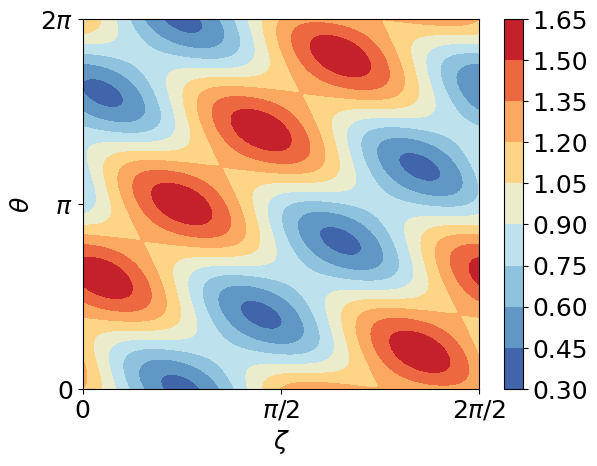

In [31]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
fieldA.plot_plt(ax=ax, fig=fig, onePeriod=True)

plot the fieldB

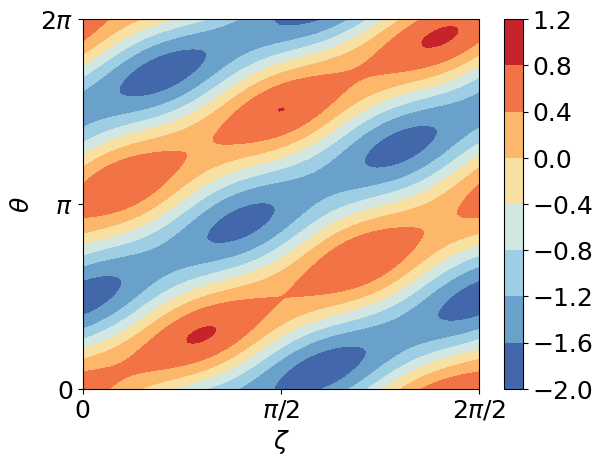

In [32]:
fig, ax = plt.subplots()
fieldB.plot_plt(ax=ax, fig=fig, onePeriod=True)

### We can use Fourier coefficients to implement the addition and subtraction of toroidal fields

$$
    A(\theta,\zeta)+B(\theta,\zeta) = \sum_{m=-M}^{M}\sum_{n=-N}^{N}(A_{m,n}+B_{m,n})\exp(\mathrm{i}(m\theta-nN_{fp}\zeta))
$$
$$
    A(\theta,\zeta)-B(\theta,\zeta) = \sum_{m=-M}^{M}\sum_{n=-N}^{N}(A_{m,n}-B_{m,n})\exp(\mathrm{i}(m\theta-nN_{fp}\zeta))
$$

In [33]:
def add(field1: ToroidalField, field2: ToroidalField) -> ToroidalField:
    assert field1.nfp == field2.nfp
    if field1.mpol == field2.mpol and field1.ntor == field2.ntor:
        reArr = field1.reArr + field2.reArr
        imArr = field1.imArr + field2.imArr
        return ToroidalField(
            nfp=field1.nfp, mpol=field1.mpol, ntor=field1.ntor,
            reArr=reArr, imArr=imArr
        )
    else:
        mpol = max(field1.mpol, field2.mpol)
        ntor = max(field1.ntor, field2.ntor)
        reArr = np.zeros((2*ntor+1)*mpol+ntor+1)
        imArr = np.zeros((2*ntor+1)*mpol+ntor+1)
        _field = ToroidalField(nfp=field1.nfp, mpol=mpol, ntor=ntor, reArr=reArr, imArr=imArr)
        for index in range(len(_field.reArr)):
            m, n = _field.indexReverseMap(index)
            _field.setRe(m, n, field1.getRe(m, n) + field2.getRe(m, n))
            _field.setIm(m, n, field1.getIm(m, n) + field2.getIm(m, n))
        return _field
    
    
def subs(field1: ToroidalField, field2: ToroidalField) -> ToroidalField:
    assert field1.nfp == field2.nfp
    if field1.mpol == field2.mpol and field1.ntor == field2.ntor:
        reArr = field1.reArr - field2.reArr
        imArr = field1.imArr - field2.imArr
        return ToroidalField(
            nfp=field1.nfp, mpol=field1.mpol, ntor=field1.ntor,
            reArr=reArr, imArr=imArr
        )
    else:
        mpol = max(field1.mpol, field2.mpol)
        ntor = max(field1.ntor, field2.ntor)
        reArr = np.zeros((2*ntor+1)*mpol+ntor+1)
        imArr = np.zeros((2*ntor+1)*mpol+ntor+1)
        _field = ToroidalField(nfp=field1.nfp, mpol=mpol, ntor=ntor, reArr=reArr, imArr=imArr)
        for index in range(len(_field.reArr)):
            m, n = _field.indexReverseMap(index)
            _field.setRe(m, n, field1.getRe(m, n) - field2.getRe(m, n))
            _field.setIm(m, n, field1.getIm(m, n) - field2.getIm(m, n))
        return _field

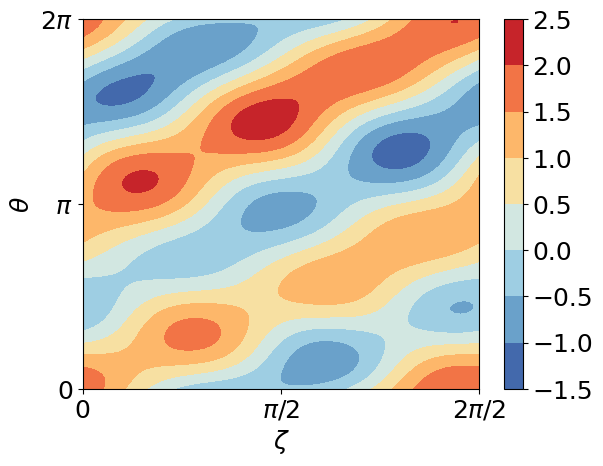

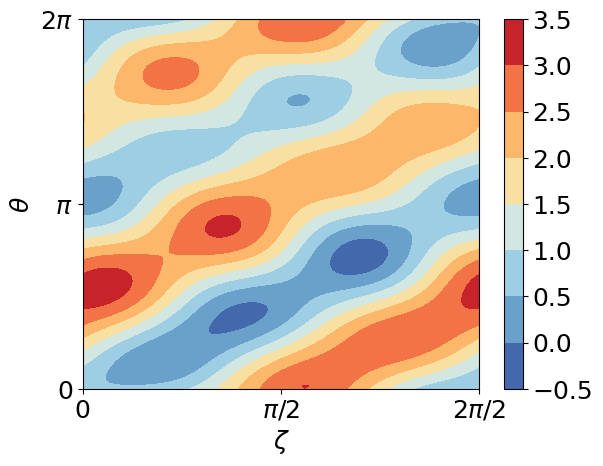

In [34]:
fieldAdd = add(fieldA, fieldB)
fieldSub = subs(fieldA, fieldB)

fig, ax = plt.subplots()
fieldAdd.plot_plt(ax=ax, fig=fig, onePeriod=True)
fig, ax = plt.subplots()
fieldSub.plot_plt(ax=ax, fig=fig, onePeriod=True)

### We can use the Fourier coefficients to get the derivative of the toroidal field

For a toroidal field $A(\theta,\varphi)$
$$
    A(\theta,\zeta) = \sum_{m=-M}^{M}\sum_{n=-N}^{N}A_{m,n}\exp(\mathrm{i}(m\theta-nN_{fp}\zeta))
$$
the derivative of $A$ can be expressed as
$$
    \frac{\partial A}{\partial\theta} = \sum_{m=-M}^{M}\sum_{n=-N}^{N}\mathrm{i}mA_{m,n}\exp(\mathrm{i}(m\theta-nN_{fp}\zeta))
$$
$$
    \frac{\partial A}{\partial\zeta} = \sum_{m=-M}^{M}\sum_{n=-N}^{N}-\mathrm{i}nN_{fp}A_{m,n}\exp(\mathrm{i}(m\theta-nN_{fp}\zeta))
$$

In [35]:
def derivatePol(field: ToroidalField) -> ToroidalField:
    r"""
    Get the field $\frac{\partial f}{\partial\theta}$
    """
    return ToroidalField(
        nfp = field.nfp, 
        mpol = field.mpol, 
        ntor = field.ntor, 
        reArr = - field.xm*field.imArr, 
        imArr =  field.xm*field.reArr
    )


def derivateTor(field: ToroidalField) -> ToroidalField:
    r"""
    Get the field $\frac{\partial f}{\partial\varphi}$
    """
    return ToroidalField(
        nfp = field.nfp, 
        mpol = field.mpol, 
        ntor = field.ntor, 
        reArr = field.nfp*field.xn*field.imArr, 
        imArr = - field.nfp*field.xn*field.reArr
    )

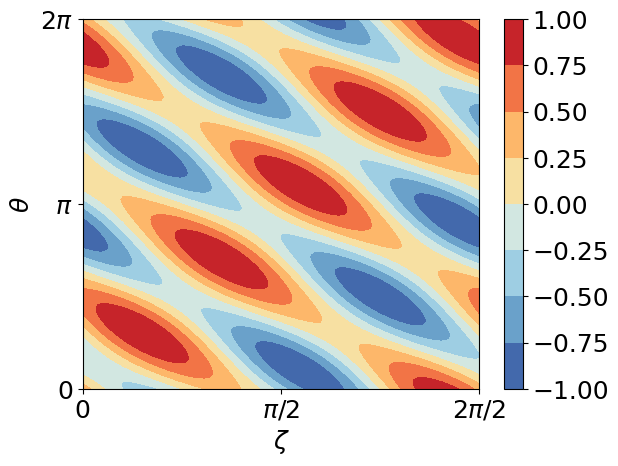

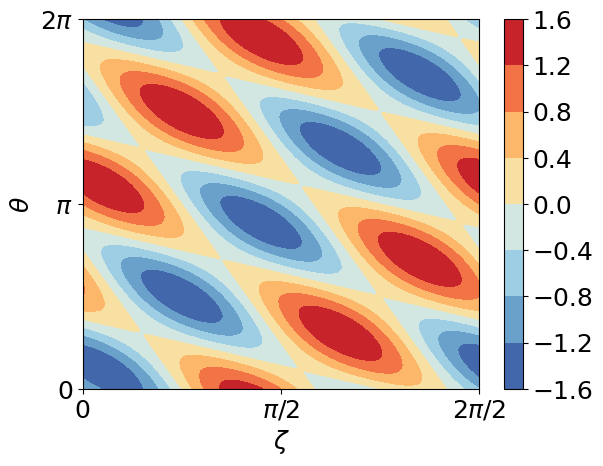

In [36]:
fieldA_theta = derivatePol(fieldA)
fieldA_zeta = derivateTor(fieldA)

fig, ax = plt.subplots()
fieldA_theta.plot_plt(ax=ax, fig=fig, onePeriod=True)
fig, ax = plt.subplots()
fieldA_zeta.plot_plt(ax=ax, fig=fig, onePeriod=True)